In [18]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [19]:
# Let's pick 10 random tickers (we can change them later)
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", 
           "TSLA", "NVDA", "JPM", "V", "JNJ"]

# Download adjusted close prices for last 5 years
data = yf.download(tickers, start="2020-01-01", end="2025-01-01")['Close']

# Inspect data
print(data.head())

C:\Users\PSinghal\AppData\Local\Temp\ipykernel_1628\4175648675.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  10 of 10 completed

Ticker           AAPL       AMZN      GOOGL         JNJ         JPM  \
Date                                                                  
2020-01-02  72.538506  94.900497  68.026024  124.983681  120.154686   
2020-01-03  71.833290  93.748497  67.670151  123.536690  118.569077   
2020-01-06  72.405685  95.143997  69.473846  123.382545  118.474815   
2020-01-07  72.065163  95.343002  69.339638  124.135986  116.460663   
2020-01-08  73.224403  94.598503  69.833183  124.118919  117.369164   

Ticker            META        MSFT      NVDA       TSLA           V  
Date                                                                 
2020-01-02  208.635406  153.042297  5.971747  28.684000  183.549042  
2020-01-03  207.531464  151.136627  5.876162  29.534000  182.089294  
2020-01-06  211.440033  151.527298  5.900806  30.102667  181.695526  
2020-01-07  211.897507  150.145721  5.972245  31.270666  181.215286  
2020-01-08  214.045731  152.537277  5.983447  32.809334  184.317413  


In [20]:
# Daily returns
returns = data.pct_change().dropna()
# Inspect returns 
# print(returns.head())

# Mean (expected return)
mean_returns = returns.mean()

# Covariance matrix
cov_matrix = returns.cov()

print("Mean Returns:\n", mean_returns)
print("\nCovariance Matrix:\n", cov_matrix)


Mean Returns:
 Ticker
AAPL     0.001182
AMZN     0.000923
GOOGL    0.001022
JNJ      0.000179
JPM      0.000746
META     0.001225
MSFT     0.000988
NVDA     0.003050
TSLA     0.002997
V        0.000582
dtype: float64

Covariance Matrix:
 Ticker      AAPL      AMZN     GOOGL       JNJ       JPM      META      MSFT  \
Ticker                                                                         
AAPL    0.000398  0.000268  0.000265  0.000092  0.000168  0.000318  0.000287   
AMZN    0.000268  0.000513  0.000300  0.000050  0.000123  0.000390  0.000295   
GOOGL   0.000265  0.000300  0.000419  0.000075  0.000169  0.000371  0.000293   
JNJ     0.000092  0.000050  0.000075  0.000153  0.000104  0.000069  0.000090   
JPM     0.000168  0.000123  0.000169  0.000104  0.000420  0.000175  0.000166   
META    0.000318  0.000390  0.000371  0.000069  0.000175  0.000800  0.000337   
MSFT    0.000287  0.000295  0.000293  0.000090  0.000166  0.000337  0.000369   
NVDA    0.000411  0.000446  0.000413  0.00

In [21]:
# Random weights for portfolio (sum = 1)
weights = np.random.random(len(tickers))
weights /= np.sum(weights)

# Expected portfolio return
port_return = np.dot(weights, mean_returns)

# Expected portfolio volatility
port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

print("Portfolio Return:", port_return)
print("Portfolio Volatility:", port_volatility)


Portfolio Return: 0.0015814942126601964
Portfolio Volatility: 0.019718921415673888


C:\Users\PSinghal\AppData\Local\Temp\ipykernel_1628\3288616273.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(stock_volatility[i], stock_returns[i], ticker)


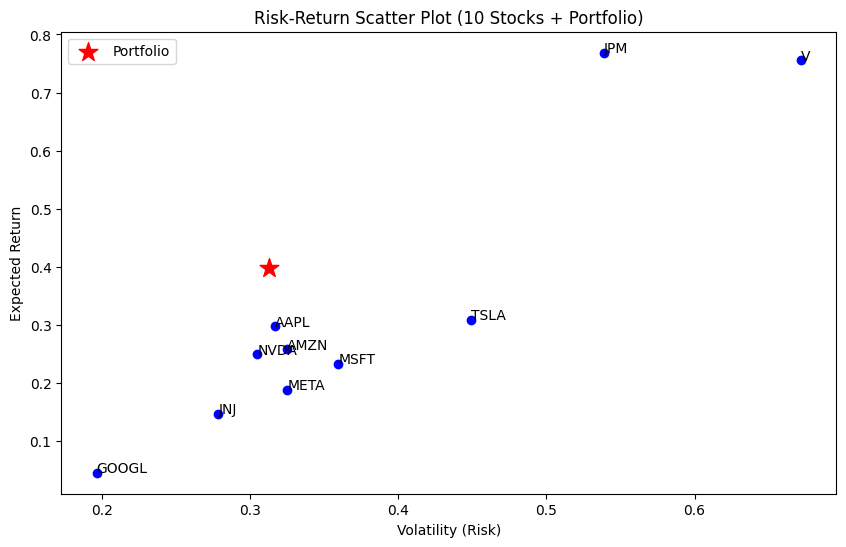

In [22]:
# Calculate individual stock risk-return
stock_returns = mean_returns * 252   # Annualize (approx. 252 trading days)
stock_volatility = returns.std() * np.sqrt(252)  # Annualized volatility

plt.figure(figsize=(10,6))
plt.scatter(stock_volatility, stock_returns, c='blue', marker='o')

# Label each point
for i, ticker in enumerate(tickers):
    plt.text(stock_volatility[i], stock_returns[i], ticker)

# Mark portfolio point
plt.scatter(port_volatility*np.sqrt(252), port_return*252, c='red', marker='*', s=200, label="Portfolio")

plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.title("Risk-Return Scatter Plot (10 Stocks + Portfolio)")
plt.legend()
plt.show()


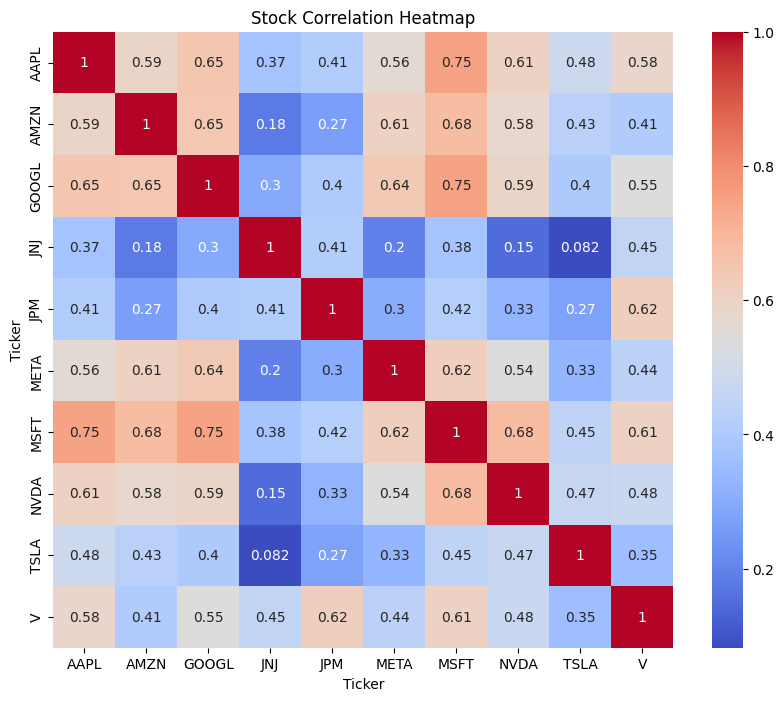

In [23]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title("Stock Correlation Heatmap")
plt.show()